Project Name:-Amazon Delivery Time Prediction
contribution by sumit sarodiya

->Project Summary

-Problem Statement:-Build a machine learning system to predict delivery times for e-commerce orders based on factors like product size, distance,traffic,weather, and shipping method.

-Data Preparation:-Load,clean, and preprocess dataset.

-Data Cleaning:-Handle missing values,remove duplicates,standardize categorical data.

-EDA:-Explore trends,visualize traffic/weather impact, and analyze agent performance.

-Preprocessing:-perform encoding and standard scaling.

-Modeling:-Train models:
                        Linear Regression
                        Random Forest Regressor
                        Gradient Boosting Regressor
                        Evaluate with RMSE, MAE, R²
                        Track with MLflow

-Deployment:-Deploy Streamlit app for accessibility.

-Results:-By project completion, A cleaned dataset.Multiple regression models (tracked in MLflow).Insights into delivery time factors.A functional Streamlit app for predictions.

#EDA

->collecting the dataset

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\A S U S\Downloads\amazon_delivery - amazon_delivery.csv")
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


->Data Integration

In [2]:
df.shape

(43739, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43648 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43648 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


->Summary of the data

In [4]:
df.describe(include='object')

,Order_ID,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Category
count,43739,43739,43648,43739,43648,43648,43739,43739,43739
unique,43739,44,176,193,6,4,4,4,16
top,nsyz997960170,2022-03-15,21:55:00,21:30:00,Fog,Low,motorcycle,Metropolitian,Electronics
freq,1,1141,460,481,7440,14999,25527,32698,2849


In [5]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [6]:
df.nunique()

Order_ID           43739
Agent_Age             22
Agent_Rating          28
Store_Latitude       521
Store_Longitude      415
Drop_Latitude       4367
Drop_Longitude      4367
Order_Date            44
Order_Time           176
Pickup_Time          193
Weather                6
Traffic                4
Vehicle                4
Area                   4
Delivery_Time         89
Category              16
dtype: int64

->Check missing value and Handling

In [7]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time         91
Pickup_Time         0
Weather            91
Traffic            91
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [8]:
df.fillna(0,inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

->Visualizing Data Distribution of data

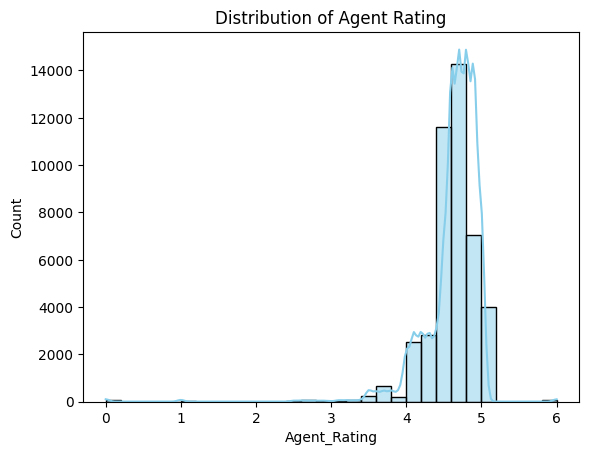

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Agent_Rating'],kde=True,bins=30,color="skyblue")
plt.title('Distribution of Agent Rating')
plt.show()

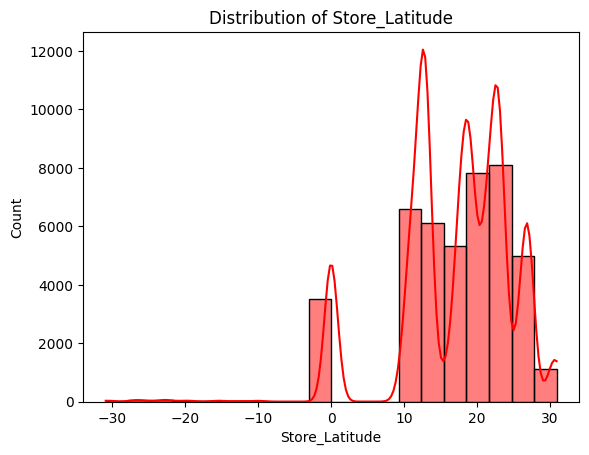

In [11]:
sns.histplot(df['Store_Latitude'],kde=True,bins=20,color='red')
plt.title('Distribution of Store_Latitude')
plt.show()

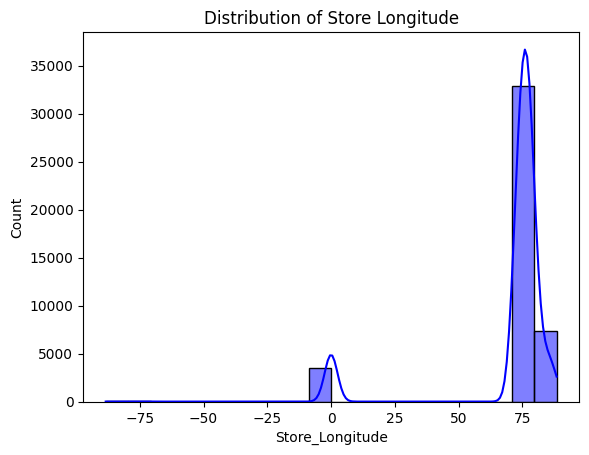

In [12]:
sns.histplot(df['Store_Longitude'],kde=True,bins=20,color='blue')
plt.title('Distribution of Store Longitude')
plt.show()

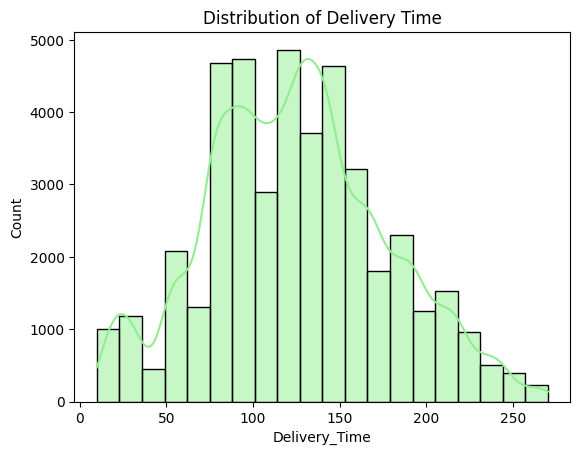

In [13]:
sns.histplot(df['Delivery_Time'],kde=True,bins=20,color='lightgreen')
plt.title('Distribution of Delivery Time')
plt.show()

->Correlation of the data

In [14]:
num_cols=['Agent_Age','Agent_Rating','Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude','Delivery_Time']

In [15]:
correlation=df[num_cols].corr()

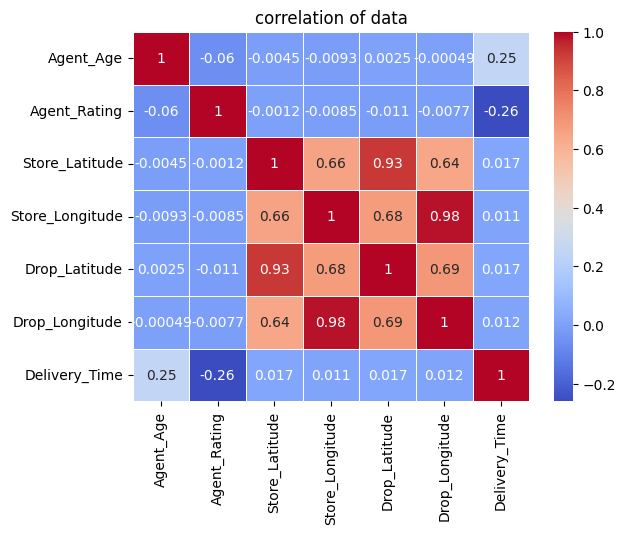

In [16]:
sns.heatmap(correlation,cmap='coolwarm',annot=True,linewidths=0.5)
plt.title("correlation of data")
plt.show()

#Insights of Data

1.Agent Age:-Older agents tend to take a little longer to deliver.

2.Agent Rating:-Higher-rated agents deliver faster.This is the strongest factor affecting delivery time.

3.Store & Drop Locations:-Stores and delivery points are usually close in location patterns (makes sense geographically).

4.Location vs Delivery Time:-The exact latitude/longitude doesn’t really decide delivery time.

5.Agent Age vs Rating:-Slight tendency that older agents might have lower ratings, but the effect is very small.

6.Final Insight:-Main drivers of Delivery Time is  Agent’s Rating (most important) and Age (next important).store/Drop locations: Highly related to each other but not to delivery time.So delivery efficiency depends more on the agent than on the geography.

#Preprocessing

->Label Encoding

In [17]:
cols=['Weather','Traffic','Vehicle','Area','Category']
for col in cols:
    df[col]=df[col].astype(str)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Weather']=le.fit_transform(df['Weather'])
df['Traffic']=le.fit_transform(df['Traffic'])
df['Vehicle']=le.fit_transform(df['Vehicle'])
df['Area']=le.fit_transform(df['Area'])
df['Category']=le.fit_transform(df['Category'])

->column Extract

In [19]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'])
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])

df['order_hour'] = df['Order_Time'].dt.hour
df['order_dayofweek'] = df['Order_Date'].dt.dayofweek   
df['pickup_delay_mins'] = (df['Pickup_Time'] - df['Order_Time']).dt.total_seconds() / 60.0

C:\Users\A S U S\AppData\Local\Temp\ipykernel_20268\3994683598.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time'] = pd.to_datetime(df['Order_Time'])
C:\Users\A S U S\AppData\Local\Temp\ipykernel_20268\3994683598.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])


->drop columns

In [20]:
df.drop(['Order_ID','Order_Date','Order_Time','Pickup_Time','Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude'],axis=1,inplace=True)

In [21]:
df.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,order_hour,order_dayofweek,pickup_delay_mins
0,37,4.9,5,1,1,3,120,2,11,5,15.0
1,34,4.5,4,2,2,0,165,4,19,4,5.0
2,23,4.4,3,3,1,3,130,14,8,5,15.0
3,38,4.7,5,4,1,0,105,3,18,1,10.0
4,32,4.6,1,1,2,0,150,15,13,5,15.0


#Split the Dataset

In [22]:
x=df.drop("Delivery_Time", axis=1)   
y=df["Delivery_Time"]                
print("Feature shape:",x.shape)
print("Target shape:",y.shape)

Feature shape: (43739, 10)
Target shape: (43739,)


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Training set size:",x_train.shape,y_train.shape)
print("Test set size:",x_test.shape,y_test.shape)

Training set size: (34991, 10) (34991,)
Test set size: (8748, 10) (8748,)


#Modeling

#Linear Regression

In [24]:
#creat a model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
#prediction
lr_pred=lr.predict(x_test)
lr_pred

array([113.44631145,  97.74486315, 144.6521522 , ..., 176.35743508,
        91.41448396, 155.5561524 ], shape=(8748,))

In [26]:
#Evalution of model
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
print("MAE:",mean_absolute_error(y_test, lr_pred))
print("RMSE:",root_mean_squared_error(y_test, lr_pred))
print("R²:",r2_score(y_test,lr_pred))

MAE: 35.055434918214836
RMSE: 45.23747049132106
R²: 0.2318031419015415


#Random Forest 

In [27]:
#create a model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50,max_depth=10,random_state=42)
rf.fit(x_train,y_train)

,n_estimators,50
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
#Prediction
rf_pred=rf.predict(x_test)
rf_pred

array([117.9529484 ,  28.3312175 , 120.72894034, ..., 196.81902743,
       102.47977453, 185.20666383], shape=(8748,))

In [29]:
#Evalution of model
print("MAE:",mean_absolute_error(y_test,rf_pred))
print("RMSE:",root_mean_squared_error(y_test, rf_pred))
print("R²:",r2_score(y_test,rf_pred))

MAE: 20.993574033021655
RMSE: 27.157179532352313
R²: 0.7231495538966642


#Gradient Boost

In [30]:
#Create a model
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
gb.fit(x_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [31]:
#Prediction
gb_pred=gb.predict(x_test)
gb_pred

array([120.16420558,  39.10806888, 131.78437718, ..., 194.59167094,
        97.1482788 , 173.75688999], shape=(8748,))

In [32]:
#Evalution of model
print("MAE:",mean_absolute_error(y_test, gb_pred))
print("RMSE:",root_mean_squared_error(y_test, gb_pred))
print("R²:",r2_score(y_test,gb_pred))

MAE: 22.0594002202105
RMSE: 28.261644249346933
R²: 0.7001729915750893


#Comparison of model

->Using Dataframe

In [33]:
preds = {
    "Linear Regression": lr_pred,
    "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred
}

results=[]
for name, y_pred in preds.items():
    results.append([
        name,
        root_mean_squared_error(y_test, y_pred),  
        mean_absolute_error(y_test, y_pred),          
        r2_score(y_test, y_pred)                      
    ])

df_results=pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R²"])
print(df_results)

               Model       RMSE        MAE        R²
0  Linear Regression  45.237470  35.055435  0.231803
1      Random Forest  27.157180  20.993574  0.723150
2  Gradient Boosting  28.261644  22.059400  0.700173


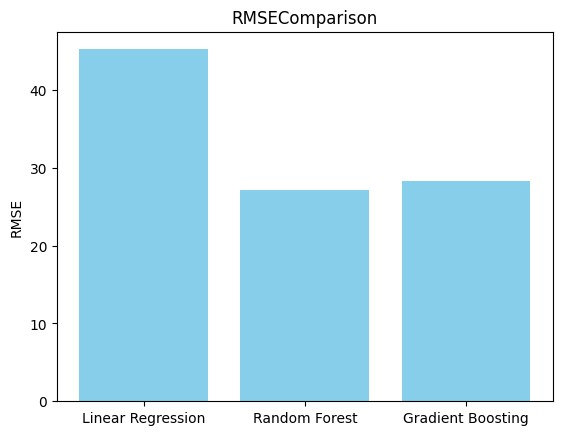

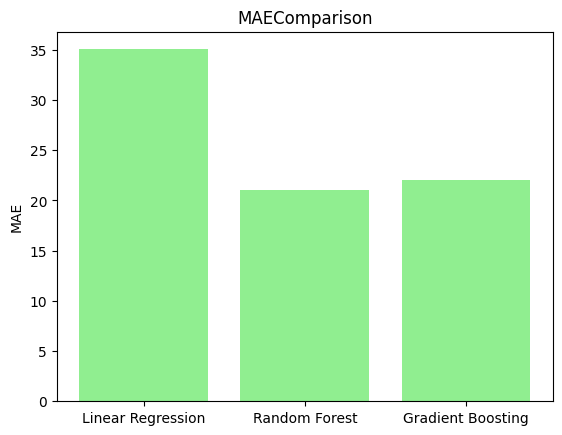

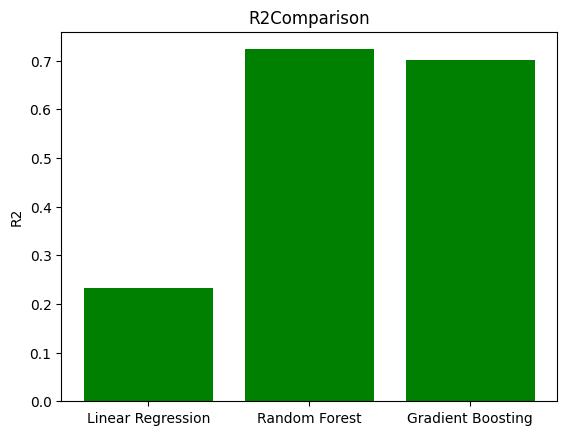

In [34]:
models=["Linear Regression","Random Forest","Gradient Boosting"]
metrics={
    "RMSE":[root_mean_squared_error(y_test,lr_pred),
            root_mean_squared_error(y_test,rf_pred),
            root_mean_squared_error(y_test,gb_pred)],
    "MAE":[mean_absolute_error(y_test,lr_pred),
           mean_absolute_error(y_test,rf_pred),
           mean_absolute_error(y_test,gb_pred)],
    "R2":[r2_score(y_test,lr_pred),
          r2_score(y_test,rf_pred),
          r2_score(y_test,gb_pred)]
}
colors=["skyblue","lightgreen","green"]

for metric, color in zip(metrics, colors):
    plt.bar(models,metrics[metric],color=color)
    plt.title(metric + "Comparison")
    plt.ylabel(metric)
    plt.show()

->Cross Validation

In [35]:
import numpy as np
from sklearn.model_selection import cross_val_score

models={
    "Linear Regression":lr,
    "Random Forest":rf,
    "Gradient Boosting":gb
}

results=[]
for name, model in models.items():
    RMSE=np.mean((cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")))
    MAE=np.mean(cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error"))
    R2=np.mean(cross_val_score(model,x,y,cv=5,scoring="r2"))

    results.append([name,RMSE,MAE,R2])

df_cv=pd.DataFrame(results,columns=["Model","RMSE(CV)","MAE(CV)","R2(CV)"])
print(df_cv)

               Model     RMSE(CV)    MAE(CV)    R2(CV)
0  Linear Regression -2077.681754 -35.256693  0.228955
1      Random Forest  -748.965051 -21.080295  0.722035
2  Gradient Boosting  -813.573647 -22.274355  0.698066


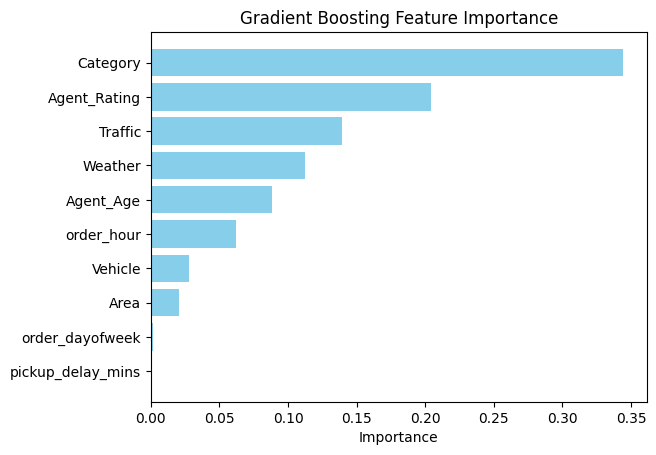

In [36]:
sorted_idx=gb.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],gb.feature_importances_[sorted_idx],color='skyblue')
plt.xlabel("Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()

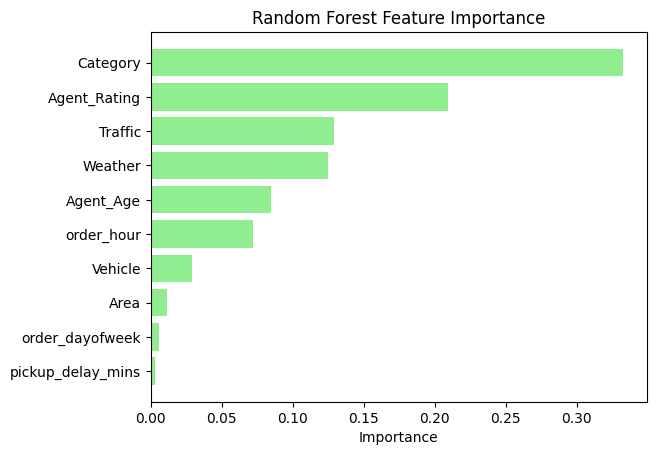

In [37]:
plt.barh(x.columns[sorted_idx],rf.feature_importances_[sorted_idx],color='lightgreen')
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

#Final Conclusion

1.Most Important Factor:-Category of the order (food, grocery, electronics, etc.) is the biggest reason delivery time changes.

2.Next Important Factor:-Agent Rating → Better-rated agents deliver faster.

3.Medium Importance Factors:
Traffic & Weather → Both have a strong effect. Bad traffic or weather = longer delivery.
Agent Age → Older agents are slightly slower.
Order Hour (time of the day) → Rush hours cause delays.

4.Less Important Factors:
Vehicle type → Has some effect, but not very big.
Area, Day of Week, Pickup Delay → Very small effect.

->Insight for Amazon:-
Delivery time is mainly affected by what is being delivered (Category) and who is delivering (Agent Rating).Traffic and weather are also critical, so real-time data can improve predictions.Factors like vehicle, day of week, and area do not impact delivery much.To improve delivery time, Amazon should focus on assigning higher-rated agents, considering order category, and using traffic/weather data for better planning.

In [38]:
#save model
import joblib
joblib.dump(lr,"Linear_Regression.pkl")
joblib.dump(rf,"Random_Forest.pkl")
joblib.dump(gb,"Gradient_Boost.pkl")

['Gradient_Boost.pkl']